![Vaccine](Images/Vaccine.png)

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features=pd.read_csv("data/training_set_features.csv")
labels=pd.read_csv("data/training_set_labels.csv")

#Merging the train features and labels
data=features.merge(labels, on="respondent_id")

#Shape of the data after merging
print("Shape of the data after merging:\n", data.shape)

# Data info
print("\n\n Data info:\n", data.info())

# Check for null values
missing_summary = data.isnull().sum()
print("\n Missing values:\n", missing_summary[missing_summary > 0])

Shape of the data after merging:
 (26707, 38)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition       

In [3]:
#HANDLING MISSING DATA

# 1. Drop employment columns (50%+ missing)
data = data.drop(['employment_industry', 'employment_occupation'], axis=1)
print(data.columns)


#2. Filling missing with NA (45.96% missing)
data['health_insurance'] = data['health_insurance'].fillna('NA')

# Separate numerical and categorical
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("\n Numerical features:\n ", list(numerical_cols))
print("\n Categorical features:\n", list(categorical_cols))


# 3. Filling numerical columns with median
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        median_val = data[col].median()
        data[col].fillna(median_val, inplace=True)

#4. Filling categorical columns with mode
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        mode_val = data[col].mode()[0]
        data[col].fillna(mode_val, inplace=True)

#Drop other unnecessary columns
data.drop(columns=["hhs_geo_region", "census_msa"],inplace=True)

data.info()

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'h1n1_vaccine',
       'seasonal_vaccine'],
      dtype='object')

 Numerical features:
  ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'b

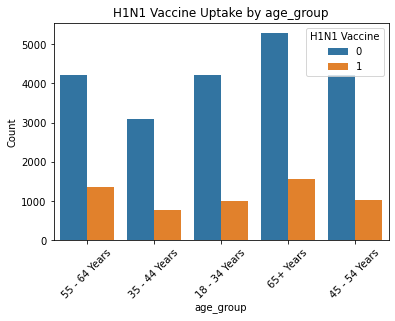

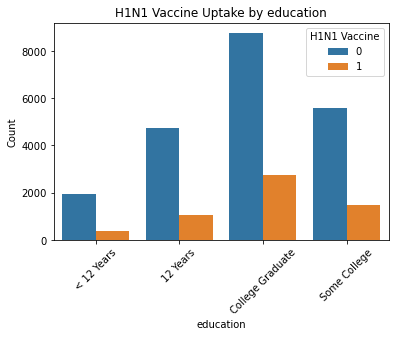

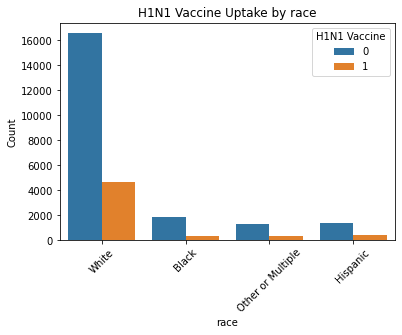

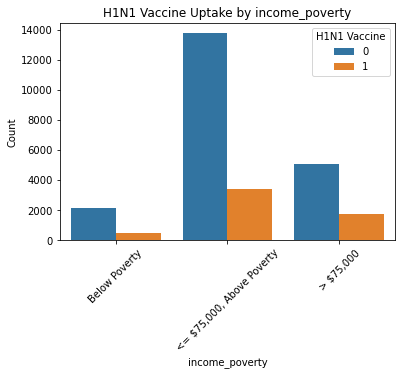

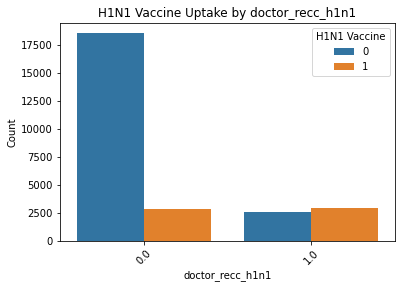

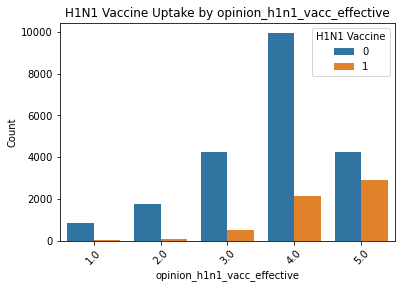

In [4]:
# Quick loop to inspect how key features relate to H1N1 vaccine
key_features = ['age_group', 'education', 'race', 'income_poverty',
                'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective']

for feature in key_features:
    sns.countplot(data=data, x=feature, hue=data['h1n1_vaccine'].astype(str))
    plt.xticks(rotation=45)
    plt.title(f"H1N1 Vaccine Uptake by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="H1N1 Vaccine")
    plt.show()



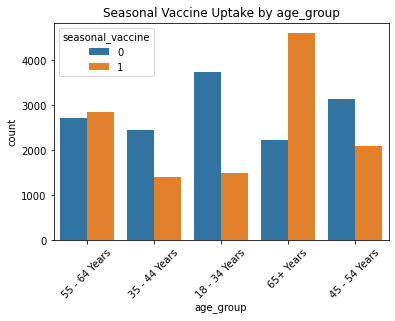

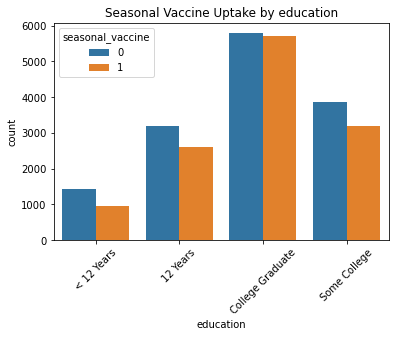

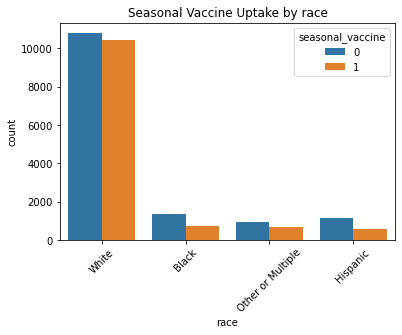

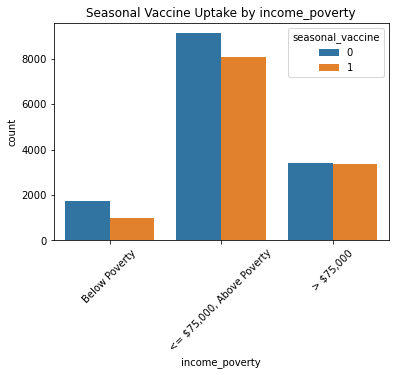

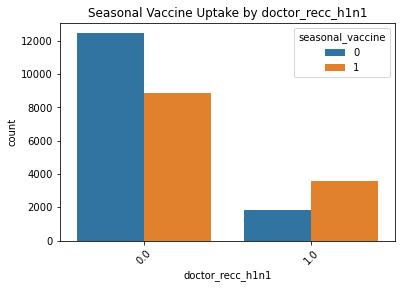

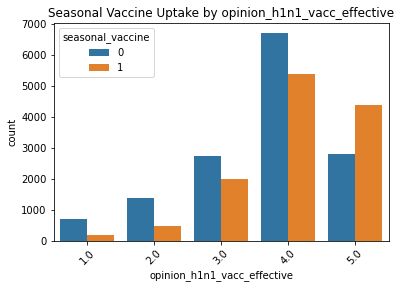

In [5]:
key_features = ['age_group', 'education', 'race', 'income_poverty',
                'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective']

for feature in key_features:
    sns.countplot(data=data, x=feature, hue='seasonal_vaccine')
    plt.xticks(rotation=45)
    plt.title(f"Seasonal Vaccine Uptake by {feature}")
    plt.show()


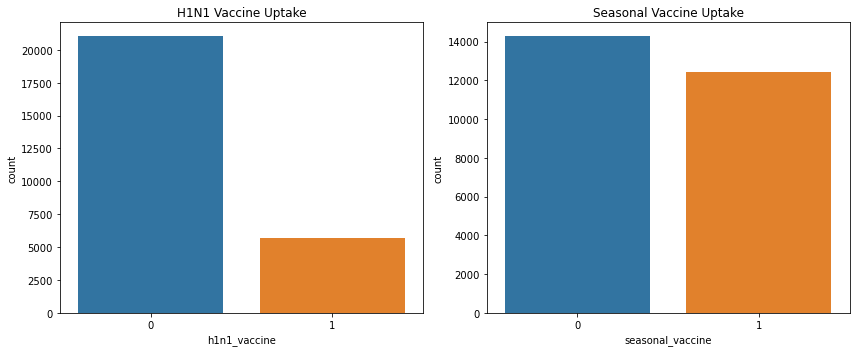

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=data, x='h1n1_vaccine', ax=axes[0])
axes[0].set_title('H1N1 Vaccine Uptake')

sns.countplot(data=data, x='seasonal_vaccine', ax=axes[1])
axes[1].set_title('Seasonal Vaccine Uptake')

plt.tight_layout()
plt.show()


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [8]:
#FEATURE ENGINEERING

# Combine household features
data['household_size'] = data['household_adults'] + data['household_children']

#Combine doctor recommendation column
data['doctor_recc_both'] = data['doctor_recc_h1n1'] + data['doctor_recc_seasonal']


#Combine multiple related behavioral flags to create an overall "cautious behavior" indicator.
safe_behaviors = [
    'behavioral_avoidance',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_large_gatherings',
    'behavioral_outside_home',
    'behavioral_touch_face'
]
data['safe_behavior_score'] = data[safe_behaviors].sum(axis=1)

# Map to numerical: 1.0 = Yes, 0.0 = No, NA = Unknown
data['health_insurance'] = data['health_insurance'].map({1.0: 1, 0.0: 0})
data['health_insurance'] = data['health_insurance'].fillna(-1)  # -1 = Unknown

#Eductaion column
edu_order = {
    '< 12 Years': 0,
    '12 Years': 1,
    'Some College': 2,
    'College Graduate': 3
}
data['education'] = data['education'].map(edu_order)

#Income column
inc_order = {
    'Below Poverty': 0,
    '<= $75,000, Above Poverty': 1,
    '> $75,000': 2
}
data['income_poverty'] = data['income_poverty'].map(inc_order)

#Age group column
age_order = {
    '18 - 34 Years': 0,
    '35 - 44 Years': 1,
    '45 - 54 Years': 2,
    '55 - 64 Years': 3,
    '65+ Years': 4
}
data['age_group'] = data['age_group'].map(age_order)


#One-Hot Encode Nominal Categories
data = pd.get_dummies(data, columns=[
    'race', 'sex', 'marital_status',
    'rent_or_own', 'employment_status'
], drop_first=True)  # Drop first to avoid multicollinearity


#Drop unnecessary columns
data.drop(columns=['household_adults', 'household_children', "doctor_recc_h1n1", "doctor_recc_seasonal"] + safe_behaviors, inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   respondent_id                         26707 non-null  int64  
 1   h1n1_concern                          26707 non-null  float64
 2   h1n1_knowledge                        26707 non-null  float64
 3   behavioral_antiviral_meds             26707 non-null  float64
 4   chronic_med_condition                 26707 non-null  float64
 5   child_under_6_months                  26707 non-null  float64
 6   health_worker                         26707 non-null  float64
 7   health_insurance                      26707 non-null  float64
 8   opinion_h1n1_vacc_effective           26707 non-null  float64
 9   opinion_h1n1_risk                     26707 non-null  float64
 10  opinion_h1n1_sick_from_vacc           26707 non-null  float64
 11  opinion_seas_va

In [10]:
corr_h1n1 = data.corr()['h1n1_vaccine'].drop('h1n1_vaccine')
corr_h1n1_sorted = corr_h1n1.sort_values(ascending=False)
print(corr_h1n1_sorted)


seasonal_vaccine                        0.377143
doctor_recc_both                        0.335635
opinion_h1n1_risk                       0.320580
opinion_h1n1_vacc_effective             0.267352
opinion_seas_risk                       0.255874
health_insurance                        0.242393
opinion_seas_vacc_effective             0.177799
health_worker                           0.168056
h1n1_concern                            0.121574
h1n1_knowledge                          0.117771
chronic_med_condition                   0.094360
safe_behavior_score                     0.076697
opinion_h1n1_sick_from_vacc             0.074580
child_under_6_months                    0.066712
education                               0.061739
income_poverty                          0.052911
age_group                               0.041074
behavioral_antiviral_meds               0.040226
race_White                              0.030887
employment_status_Not in Labor Force    0.013065
opinion_seas_sick_fr

In [11]:
corr_s1 = data.corr()['seasonal_vaccine'].drop('seasonal_vaccine')
corr_s1_sorted = corr_s1.sort_values(ascending=False)
print(corr_s1_sorted)


opinion_seas_risk                       0.386916
h1n1_vaccine                            0.377143
opinion_seas_vacc_effective             0.358869
doctor_recc_both                        0.318217
age_group                               0.277454
opinion_h1n1_risk                       0.215650
opinion_h1n1_vacc_effective             0.203187
chronic_med_condition                   0.169465
h1n1_concern                            0.154488
employment_status_Not in Labor Force    0.145819
safe_behavior_score                     0.129281
health_worker                           0.126977
h1n1_knowledge                          0.119779
health_insurance                        0.110874
race_White                              0.100314
income_poverty                          0.063805
education                               0.056681
opinion_h1n1_sick_from_vacc             0.027964
child_under_6_months                    0.013424
behavioral_antiviral_meds               0.006013
respondent_id       

## Building a preprocessing pipeline


## Defining feature types.

In [12]:
# Drop identifier and target columns
features = data.drop(columns=["respondent_id", "h1n1_vaccine", "seasonal_vaccine"])

# Define numerical, ordinal, and nominal features
numerical_features = ['household_income', 'household_size', 'safe_behavior_score']
ordinal_features = ['age_group', 'education', 'income_poverty', 'employment_status', 'health_insurance', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc']  # example list — adjust based on your encoding
nominal_features = [col for col in features.columns if col not in numerical_features + ordinal_features]


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer


### Creating preprocessing steps

In [14]:
# Numeric pipeline: median imputation + scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Ordinal pipeline: impute then ordinal encode
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

# Nominal pipeline: impute then one-hot encode
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])


 ### Combine into a ColumnTransformer

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('nom', nominal_transformer, nominal_features)
    ])


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define full pipeline with preprocessing and logistic regression
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


### Identify Irrelevant Features



In [17]:
# Percentage of missing values per column
missing_percent = data.isnull().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0.4])  # show those with > 40% missing


Series([], dtype: float64)


In [18]:
low_variance_cols = [col for col in data.columns if data[col].nunique() <= 1]
print("Low-variance columns:", low_variance_cols)


Low-variance columns: []


No low-variance columns were found.

Common irrelevant features in this vaccine dataset might include:

respondent_id: just an identifier

In [ ]:
# Drop respondent_id
data_cleaned = data.drop(columns=['respondent_id'])

# Save to CSV
data_cleaned.to_csv("cleaned_vaccine_data.csv", index=False)
print("Cleaned dataset saved as 'cleaned_vaccine_data.csv'")


Cleaned dataset saved as 'cleaned_vaccine_data.csv'


# Basic Modelling
With the cleaned dataset prepared, the next step is to begin modelling. In this section, we will first build a baseline classifier using Logistic Regression, followed by several additional models without hyperparameter tuning. Each model will be evaluated to identify the strongest performers, which will then be selected for further tuning and optimization in the next phase.

### MultiOutputClassifier Import
Since this task involves predicting two binary labels (H1N1 and seasonal flu vaccines), we import `MultiOutputClassifier`. This allows us to wrap classifiers that typically handle a single target so they can predict multiple outputs simultaneously.

In [20]:
# Import MultiOutputClassifier
from sklearn.multioutput import MultiOutputClassifier

### ModelTrainer Class Definition  
To streamline the training and prediction process across multiple models, we define a `ModelTrainer` class. This class wraps a given base model (e.g. Logistic Regression) using `MultiOutputClassifier` to support multi-label classification.  

The class includes methods for:
- **Training** the model on test data.
- Making class label **predictions**.
- Generating **predicted probabilities** for evaluation metrics to support probability-based decision-making.

In [21]:
# Create a ModelTrainer class
class ModelTrainer:
    
    def __init__(self, base_model, model_name):
        # Save the model name for identification
        self.model_name = model_name
        # Wrap the base model (e.g., LogisticRegression) in MultiOutputClassifier to handle both vaccine labels
        self.model = MultiOutputClassifier(base_model)
        
    def train(self, X_train, y_train):
        # Fit the wrapped model on the training data
        self.model.fit(X_train, y_train)
        
    def predict(self, X):
        # Return predicted classes (0 or 1) for both labels
        return self.model.predict(X)
    
    def predict_proba(self, X):
        # Return predicted probabilities for both labels
        return self.model.predict_proba(X)

### Importing classification_report  
We import `classification_report` to get access to various model evaluation metrics, particularly f1_score and recall.

In [22]:
# Import classification_report
from sklearn.metrics import classification_report

### Evaluator Class Definition
To simplify model evaluation, we define an `Evaluator` class with a single method, `evaluate`, which prints out performance metrics for each target label.  

This method:
- Takes the **true labels** and **predicted labels** as input, along with a **model name** for identification.
- Iterates through each label (h1n1 and seasonal vaccine), generating a **classification report** that includes precision, recall, F1 score, and support.

In [23]:
# Create an Evaluator class
class Evaluator:
    def evaluate(y_true, y_pred, model_name):
        print(f"\n===== Evaluation Report for {model_name} =====\n")

        for i, label in enumerate(y_true.columns):
            true_vals = y_true[label]
            pred_vals = y_pred[:, i]

            # Print classification report for this label
            print(f"\n--- {label} ---")
            print(classification_report(true_vals, pred_vals))

### Importing Models and Train-Test Split Utility  
We import four classifiers: `LogisticRegression`,  `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`.

Additionally, we import `train_test_split` to divide the dataset into training and validation sets.

In [24]:
# Import relevant models and train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

### Create a dataframe for the cleaned data

In [25]:
# Create a dataframe for cleaned vaccine data
df = pd.read_csv("cleaned_vaccine_data.csv")

### Separating Features and Labels 

In [26]:
# Separate features and labels
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df[['h1n1_vaccine', 'seasonal_vaccine']]

### Train_test_split
We split the dataset into training and test sets using `train_test_split`.  The `random_state` is set to 42 so the data split is reproducable. The split is also stratified to handle the class imbalance.

In [27]:
# Train-validation split with stratification
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Modelling and Evaluation

### Logistic Regression (Baseline Model)

In [28]:
# Initialise
log_model = ModelTrainer(LogisticRegression(max_iter=1000), "Logistic Regression")

# Train
log_model.train(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_val)

# Evaluate
Evaluator.evaluate(y_val, y_pred_log, "Logistic Regression")


===== Evaluation Report for Logistic Regression =====


--- h1n1_vaccine ---
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6311
           1       0.71      0.45      0.55      1702

    accuracy                           0.84      8013
   macro avg       0.79      0.70      0.73      8013
weighted avg       0.83      0.84      0.83      8013


--- seasonal_vaccine ---
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      4282
           1       0.77      0.73      0.75      3731

    accuracy                           0.77      8013
   macro avg       0.77      0.77      0.77      8013
weighted avg       0.77      0.77      0.77      8013



**Evaluation:**

The baseline logistic regression model performed fairly well, with an **f1 score of 0.91** for people who did not receive the h1n1 vaccine and **0.79** for people who didn't receive the seasonal vaccine. This suggest that the model had solid predictive capability when identifying unvaccinated individuals, which is a key aim of project. However, when it came to identifying people who were vaccinated the model performed worse, particularly for h1n1 vaccinations where the **f1 score was 0.55**.  
The model's ability to accurately predict individuals that won't get vaccinated is the priority, to ensure these members of the public can be addressed. Therefore, having **recall values of 0.81 and 0.95** on unvaccinated individuals, for the relevant vaccines, is positive. This model works as a good baseline to work off and optimise.

### Decision Tree

In [29]:
# Initialise
dt_model = ModelTrainer(DecisionTreeClassifier(), "Decision Tree")

# Train
dt_model.train(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_val)

# Evaluate
Evaluator.evaluate(y_val, y_pred_dt, "Decision Tree")


===== Evaluation Report for Decision Tree =====


--- h1n1_vaccine ---
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6311
           1       0.45      0.50      0.48      1702

    accuracy                           0.77      8013
   macro avg       0.66      0.67      0.66      8013
weighted avg       0.77      0.77      0.77      8013


--- seasonal_vaccine ---
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4282
           1       0.65      0.66      0.66      3731

    accuracy                           0.68      8013
   macro avg       0.68      0.68      0.68      8013
weighted avg       0.68      0.68      0.68      8013



**Evaluation:**

The decision tree model had lower performance than the logistic regression baseline, with an **f1-score of 0.85** for individuals who didn't receive the h1n1 vaccine and **0.70** for those who didn't receive the seasonal vaccine. These results suggest that model retained some ability to identify unvaccinated individuals. However, it performed poorly when identifying vaccinated individuals, with **f1-scores of 0.49 and 0.66** for h1n1 and seasonal vaccines, respectively.  
Importantly the model's **recall for unvaccinated individuals of 0.84 for h1n1 vaccines and 0.71 for seasonal vaccines**, which was lower than the baseline. This under-classification poses a concern for the projects aim of accurately identifying unvaccinated individuals for targetted intervention. While the model did not perform poorly overall, it would require further tuning to rival other baseline models in both accuracy and effectiveness.

### Random Forest

In [30]:
# Initialise
rf_model = ModelTrainer(RandomForestClassifier(), "Random Forest")

# Train
rf_model.train(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_val)

# Evaluate
Evaluator.evaluate(y_val, y_pred_rf, "Random Forest")


===== Evaluation Report for Random Forest =====


--- h1n1_vaccine ---
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6311
           1       0.74      0.45      0.56      1702

    accuracy                           0.85      8013
   macro avg       0.80      0.70      0.73      8013
weighted avg       0.84      0.85      0.83      8013


--- seasonal_vaccine ---
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4282
           1       0.77      0.73      0.75      3731

    accuracy                           0.77      8013
   macro avg       0.77      0.77      0.77      8013
weighted avg       0.77      0.77      0.77      8013



**Evaluation:**

The Random Forest model showed comparable performance to the Logistic Regression baseline, particularly in predicting unvaccinated individuals. It achieved an **F1 score of 0.91** for those who did not receive the h1n1 vaccine and **0.79** for those who did not receive the seasonal vaccine. These results indicate strong predictive ability for the target group of unvaccinated individuals. Performance was weaker for identifying vaccinated individuals, especially for h1n1, where the **F1 score was 0.56**.  
Notably, the model's **recall for unvaccinated individuals was 0.96 for h1n1 vaccines and 0.81 for seasonal vaccines**, aligning with the project’s aim to reliably identify people unlikely to get vaccinated. The Random Forest model offers a strong performance in the key metrics and provides a good alternative to logistic regression.

### Gradient Boosting

In [31]:
# Initialise
gb_model = ModelTrainer(GradientBoostingClassifier(), "Gradient Boosting")

# Train
gb_model.train(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_val)

# Evaluate
Evaluator.evaluate(y_val, y_pred_gb, "Gradient Boosting")


===== Evaluation Report for Gradient Boosting =====


--- h1n1_vaccine ---
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6311
           1       0.73      0.47      0.57      1702

    accuracy                           0.85      8013
   macro avg       0.80      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013


--- seasonal_vaccine ---
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      4282
           1       0.78      0.74      0.76      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



**Evaluation:**

The Gradient Boosting model performed well, delivering strong results in identifying unvaccinated individuals. It achieved an **F1 score of 0.91** for people who did not receive the h1n1 vaccine and **0.80** for those who did not receive the seasonal vaccine, indicating effective predictive capability for the target group. However, as with other models, performance dropped when identifying vaccinated individuals, particularly for h1n1 where the **F1 score was 0.57**.

Importantly, the model achieved **high recall scores among unvaccinated individuals of 0.95 for h1n1 vaccines and 0.82 for seasonal vaccines**, making it highly reliable for finding those who may need targeted outreach. Overall Gradient Boosting offers strong and comparable performance than other baseline models with it's balanced predictions and high recall for unvaccinated individuals.

## Models recommended for hypertuning
Based on the evaluation results and the project’s focus on accurately identifying unvaccinated individuals for targeted public health outreach, the two most suitable models to proceed with are Gradient Boosting and Random Forest.

Both models consistently demonstrated high F1 scores for unvaccinated individuals: 
- Gradient Boosting - 0.91 for h1n1 vaccines and 0.80 for seasonal vaccines
- Random Forest  - 0.91 for h1n1 vaccines and 0.79 for seasonal vaccines

Both models also achieved the highest recall rates among all models for this group:
- Gradient Boosting - 0.95 for h1n1 and 0.82 for seasonal vaccines
- Random Forest - 0.96 h1n1 for and 0.81 for seasonal vaccines

Ensuring that the majority of unvaccinated individuals are correctly identified is a critical factor in guiding public health interventions, making these metrics particularly important for model evaluation. 

Furthermore, both models offer robust predictive performance and greater stability across both labels. In contrast, the Decision Tree underperformed in key F1 and recall metrics (particularly for vaccinated individuals), and lacked the overall balance seen in the ensemble approaches. Logistic Regression, provided a reliable baseline performance but was outperformed in key recall and F1 metrics. Therefore, Gradient Boosting and Random Forest are recommended for further hyperparameter tuning to enhance their effectiveness in this public health task.

#  **HYPERPARAMETER TUNNING**

After training initial baseline models, we proceeded to improve model performance through **hyperparameter tuning**. This process involves searching for the best combination of model parameters to optimize performance metrics such as accuracy, F1-score, or AUC.

Given the critical public health need to accurately identify unvaccinated individuals, we performed hyperparameter tuning on the two best-performing models:

- **Gradient Boosting Classifier**
- **Random Forest Classifier**

These models were selected based on their strong F1 scores and recall for the unvaccinated class. We used `GridSearchCV` with 5-fold cross-validation and optimized for the weighted F1 score.


In [ ]:
from sklearn.model_selection import train_test_split

# Full features and labels
X = df.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df[['h1n1_vaccine', 'seasonal_vaccine']]


In [81]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)


In [82]:
# Split the targets for multi-label
y_train_h1n1 = y_train['h1n1_vaccine']
y_test_h1n1 = y_test['h1n1_vaccine']

y_train_seasonal = y_train['seasonal_vaccine']
y_test_seasonal = y_test['seasonal_vaccine']

### Define Models and Parameter Grids
#### 1.For Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

#### 2. For Gradient Boosting:

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5]
}


#### 3. Run GridSearchCV with F1 Macro Scoring
We should optimize for f1_macro or recall_macro to emphasize unvaccinated individuals (assuming class 0 is unvaccinated).

In [78]:
#  for H1N1 with Random Forest
rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=rf_params,
                       scoring='f1_macro',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train_h1n1)

print("Best parameters for H1N1 RF:", grid_rf.best_params_)
print("Best F1 Score:", grid_rf.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.5min finished


Best parameters for H1N1 RF: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.7318305656658579


In [79]:
#  for Seasonal Vaccine with Gradient Boosting:
gb = GradientBoostingClassifier(random_state=42)

grid_gb = GridSearchCV(estimator=gb,
                       param_grid=gb_params,
                       scoring='f1_macro',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

grid_gb.fit(X_train, y_train_seasonal)

print("Best parameters for Seasonal GB:", grid_gb.best_params_)
print("Best F1 Score:", grid_gb.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.3min finished


Best parameters for Seasonal GB: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}
Best F1 Score: 0.7793555273594437


#### 4. Evaluate Tuned Models on the Test Set

In [83]:
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train, y_train_h1n1)
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test_h1n1, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4207
           1       0.73      0.46      0.56      1135

    accuracy                           0.85      5342
   macro avg       0.80      0.71      0.74      5342
weighted avg       0.84      0.85      0.84      5342



**Class 0 (Unvaccinated) — Target Group**
Recall: 0.96 → The model correctly identifies 96% of unvaccinated individuals — excellent performance for your project's goal.

Precision: 0.87 → Of those predicted as unvaccinated, 87% were actually unvaccinated. This indicates low false positives.

F1-score: 0.91 → Strong overall balance between precision and recall for this group.

**Interpretation**: The model is doing a great job at detecting unvaccinated individuals, which is the primary focus of your project. Hyperparameter tuning successfully improved its ability to recall class 0.

**Class 1 (Vaccinated)**
Recall: 0.46 → The model identifies only 46% of vaccinated individuals. More than half are misclassified.

Precision: 0.73 → Of those predicted as vaccinated, 73% were correct.

F1-score: 0.56 → Indicates moderate performance.

**Interpretation**: The model struggles to identify vaccinated individuals, but this may be acceptable if the priority is to reduce false negatives for unvaccinated people (i.e., make sure we don't miss those who need vaccines).

**Overall Metrics**

Accuracy: 85% → The model predicts correctly 85% of the time.

Macro Avg (Unweighted):

Precision: 0.80

Recall: 0.71

F1: 0.74

Weighted Avg (Accounts for class imbalance):

Precision: 0.84

Recall: 0.85

F1: 0.84

The weighted average reflects the overall performance but leans toward class 0 due to its higher frequency.

Hyperparameter tuning led to strong recall and F1-score for unvaccinated individuals, which aligns perfectly with the project’s public health goals.

The tradeoff is a lower recall for vaccinated individuals, which may be acceptable in your context.

This tuned model (likely Random Forest or Gradient Boosting) is now better optimized to minimize the risk of missing people who need the vaccine.

